[깃허브 주소](https://github.com/ADPclass/ADP_book_ver01/tree/main/%EC%B5%9C%EC%8B%A0%20%EA%B8%B0%EC%B6%9C%EB%8F%99%ED%98%95%20%EB%AA%A8%EC%9D%98%EA%B3%A0%EC%82%AC)

## 머신러닝
### 1. 데이터 전처리 및 군집생성
#### (1) 결측치를 확인하고 결측치를 제거하시오(EDA).
#### (2) 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내시요.
#### (3) 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요.

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem1.csv')
df.head()

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5


#### (1) 결측치를 확인하고 결측치를 제거하시오(EDA).

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   MntWines             2240 non-null   int64  
 7   MntFruits            2240 non-null   int64  
 8   MntMeatProducts      2240 non-null   int64  
 9   MntFishProducts      2240 non-null   int64  
 10  MntSweetProducts     2240 non-null   int64  
 11  NumDealsPurchases    2240 non-null   int64  
 12  NumWebPurchases      2240 non-null   int64  
 13  NumCatalogPurchases  2240 non-null   int64  
 14  NumStorePurchases    2240 non-null   int64  
 15  NumWebVisitsMonth    2240 non-null   i

In [3]:
df.isna().sum()

ID                      0
Year_Birth              0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
dtype: int64

In [4]:
df.groupby(['Marital_Status']).median()['Income']

Marital_Status
Absurd      72365.5
Alone       35860.0
Divorced    52683.0
Married     51876.0
Single      48904.0
Together    51369.0
Widow       56551.0
YOLO        48432.0
Name: Income, dtype: float64

In [5]:
df

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5
2236,4001,1946,Together,64014.0,2,1,406,0,30,0,0,7,8,2,5,7
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3


In [6]:
df_nonull = df

fill_median_func = lambda g: g.fillna(g.median())
df_nonull = df_nonull.groupby('Marital_Status').apply(fill_median_func)

df_nonull.index = df_nonull.index.droplevel(0)
df_nonull.sort_index(inplace=True)

df_nonull.isna().sum()

ID                     0
Year_Birth             0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [7]:
df_nonull.isnull().sum()

ID                     0
Year_Birth             0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
dtype: int64

In [8]:
df_nonull

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5
2236,4001,1946,Together,64014.0,2,1,406,0,30,0,0,7,8,2,5,7
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3


[해석]
- 결측치는 Income 변수에만 있었고, Marital_Status 별 Income의 중앙값으로 대체하였음.

#### (2) 이상치 제거하는 방법을 설명하고, 이상치 제거하고 난 결과를 통계적으로 나타내시요.

In [9]:
# 연속형 변수만 선택
df_select = df_nonull.drop(columns=['ID', 'Marital_Status'], axis=1)
df_melt = pd.melt(df_select, var_name='col', value_name='value')
df_melt

,col,value
0,Year_Birth,1957.0
1,Year_Birth,1954.0
2,Year_Birth,1965.0
3,Year_Birth,1984.0
4,Year_Birth,1981.0
...,...,...
31355,NumWebVisitsMonth,5.0
31356,NumWebVisitsMonth,7.0
31357,NumWebVisitsMonth,6.0
31358,NumWebVisitsMonth,3.0


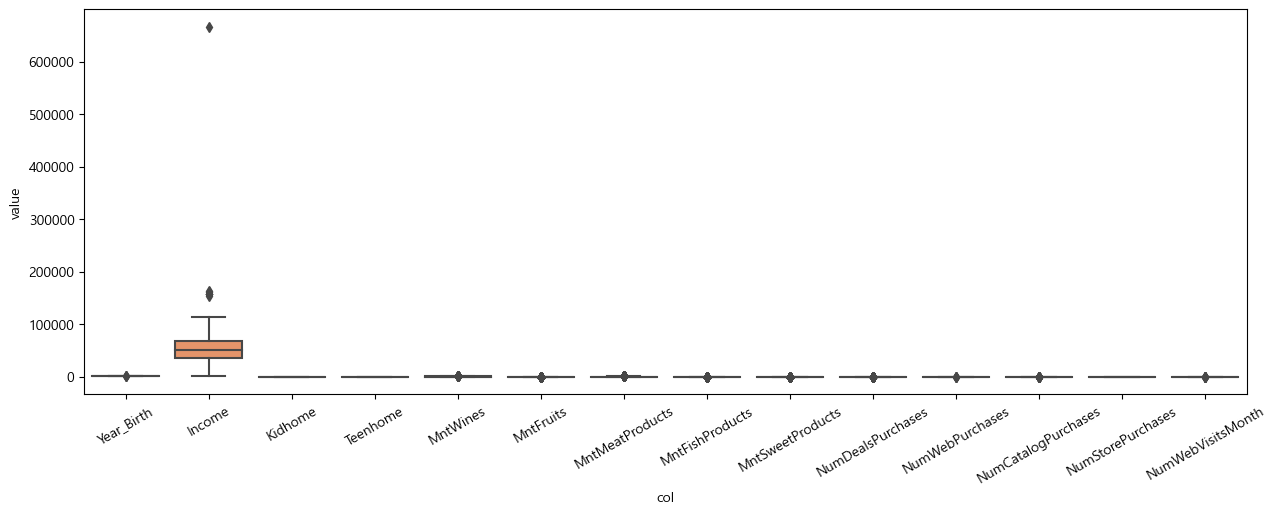

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(data=df_melt, x='col', y='value')
plt.xticks(rotation=30)
plt.show()

In [11]:
# IQR을 이용한 이상치 탐색 함수
def detect_outliers(df=None, column=None, weight=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3-Q1
    IQR_weight = IQR * weight
    
    outlier_idx = df[(df[column] < Q1 - IQR_weight) | (df[column] > Q3 + IQR_weight)].index
    
    return outlier_idx

# IQR로 이상치를찾아 인덱스 저장되어 있음.
out_index = detect_outliers(df=df_nonull, column='Income')
df_nonull.loc[out_index]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
164,8475,1973,Married,157243.0,0,1,20,2,1582,1,2,15,0,22,0,0
617,1503,1976,Together,162397.0,1,1,85,1,16,2,1,0,0,0,1,1
655,5555,1975,Divorced,153924.0,0,0,1,1,1,1,1,0,0,0,0,0
687,1501,1982,Married,160803.0,0,0,55,16,1622,17,3,15,0,28,1,0
1300,5336,1971,Together,157733.0,1,0,39,1,9,2,0,0,1,0,1,1
1653,4931,1977,Together,157146.0,0,0,1,0,1725,2,1,0,0,28,0,1
2132,11181,1949,Married,156924.0,0,0,2,1,2,1,1,0,0,0,0,0
2233,9432,1977,Together,666666.0,1,0,9,14,18,8,1,4,3,1,3,6


In [12]:
# 666666.0 값만 평균으로 대체
df_nonull.loc[out_index[-1], 'Income'] = df_nonull['Income'].mean()
df_nonull.loc[out_index]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
164,8475,1973,Married,157243.000000,0,1,20,2,1582,1,2,15,0,22,0,0
617,1503,1976,Together,162397.000000,1,1,85,1,16,2,1,0,0,0,1,1
655,5555,1975,Divorced,153924.000000,0,0,1,1,1,1,1,0,0,0,0,0
687,1501,1982,Married,160803.000000,0,0,55,16,1622,17,3,15,0,28,1,0
1300,5336,1971,Together,157733.000000,1,0,39,1,9,2,0,0,1,0,1,1
1653,4931,1977,Together,157146.000000,0,0,1,0,1725,2,1,0,0,28,0,1
2132,11181,1949,Married,156924.000000,0,0,2,1,2,1,1,0,0,0,0,0
2233,9432,1977,Together,52231.835268,1,0,9,14,18,8,1,4,3,1,3,6


[해석]
- 컬럼별 상자그림에서 Income에서 이상치를 발견하였기에 해당 이상치를 제거하기 위해 IQR로 이상치를 찾음.
- 대부분의 이상치는 고소득층으로 볼 수 있지만 666666.0인 값은 비정상적인 값으로 판단하여 Income의 평균값으로 대체함.

In [13]:
# # 내가 작성한 이상치를 확인하기 위한 상자그림
# # 연속형 변수들의 상자그림
# fig, ax = plt.subplots(nrows=5, ncols=3, figsize=(16, 9))

# features = df_select.columns

# for i, feature in zip(range(14), features):
#     row = int(i/3)
#     col = i%3
#     sns.boxplot(data=df_select, x=feature, ax=ax[row][col])
#     plt.tight_layout()
# #     plt.show()

#### (3) 전처리한 데이터로 Kmeans, DBSCAN 등 방법으로 군집을 생성하세요.
[해석]
- 추가 전처리 군집분석을 위해서 범주형 변수 Marital_Status 인코딩이 필요함.
- 최적의 클러스터 개수를 찾기 위해서 엘보우 기법을 사용함.

In [14]:
from sklearn.cluster import KMeans
df_dum = pd.get_dummies(data=df_nonull, columns=['Marital_Status'])
df_dum.head()

,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumStorePurchases,NumWebVisitsMonth,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,58138.0,0,0,635,88,546,172,88,...,4,7,0,0,0,0,1,0,0,0
1,2174,1954,46344.0,1,1,11,1,6,2,1,...,2,5,0,0,0,0,1,0,0,0
2,4141,1965,71613.0,0,0,426,49,127,111,21,...,10,4,0,0,0,0,0,1,0,0
3,6182,1984,26646.0,1,0,11,4,20,10,3,...,4,6,0,0,0,0,0,1,0,0
4,5324,1981,58293.0,1,0,173,43,118,46,27,...,6,5,0,0,0,1,0,0,0,0


In [15]:
df_dum.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       2240 non-null   int64  
 1   Year_Birth               2240 non-null   int64  
 2   Income                   2240 non-null   float64
 3   Kidhome                  2240 non-null   int64  
 4   Teenhome                 2240 non-null   int64  
 5   MntWines                 2240 non-null   int64  
 6   MntFruits                2240 non-null   int64  
 7   MntMeatProducts          2240 non-null   int64  
 8   MntFishProducts          2240 non-null   int64  
 9   MntSweetProducts         2240 non-null   int64  
 10  NumDealsPurchases        2240 non-null   int64  
 11  NumWebPurchases          2240 non-null   int64  
 12  NumCatalogPurchases      2240 non-null   int64  
 13  NumStorePurchases        2240 non-null   int64  
 14  NumWebVisitsMonth       

[1050019735174.8577, 349224130671.3877, 206900018691.13672, 147505610093.37918, 106270577803.29666, 77199699175.02283, 64193413873.960785, 54684392747.79426, 47605950448.42976, 42584533755.853836]


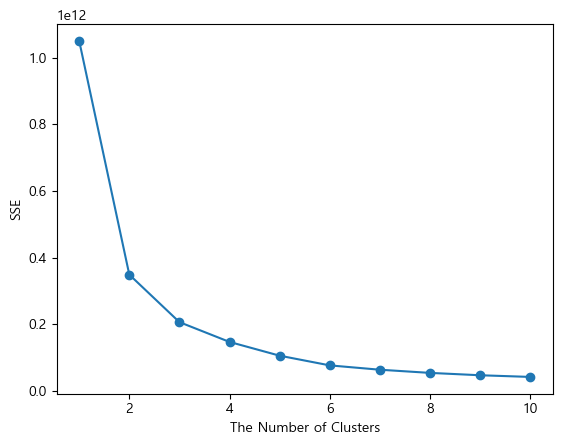

In [16]:
def elbow(X):
    sse = []
    for i in range(1, 11):
        km = KMeans(n_clusters=i, random_state=1)
        km.fit(X)
        sse.append(km.inertia_)
        
    plt.plot(range(1, 11), sse, marker='o')
    plt.xlabel('The Number of Clusters')
    plt.ylabel('SSE')
    print(sse)
    
elbow(df_dum)

[해석]
- 시각화 결과, 최적의 클러스터 개수는 3으로 정할 수 있고, 3개의 군집으로 나눌 수 있음.

In [17]:
# 최적의 k로 k-means 군집화 실행
km = KMeans(n_clusters=3, random_state=1)
km.fit(df_dum)

# 할당된 군집을 credit 데이터에 추가
new_labels = km.labels_
df_nonull['cluster'] = new_labels
df_nonull

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cluster
0,5524,1957,Single,58138.0,0,0,635,88,546,172,88,3,8,10,4,7,2
1,2174,1954,Single,46344.0,1,1,11,1,6,2,1,2,1,1,2,5,2
2,4141,1965,Together,71613.0,0,0,426,49,127,111,21,1,8,2,10,4,0
3,6182,1984,Together,26646.0,1,0,11,4,20,10,3,2,2,0,4,6,1
4,5324,1981,Married,58293.0,1,0,173,43,118,46,27,5,5,3,6,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5,2
2236,4001,1946,Together,64014.0,2,1,406,0,30,0,0,7,8,2,5,7,2
2237,7270,1981,Divorced,56981.0,0,0,908,48,217,32,12,1,2,3,13,6,2
2238,8235,1956,Together,69245.0,0,1,428,30,214,80,30,2,6,5,10,3,0


[해석]
- 최종적으로, 원핫인코딩이 되어있는 전처리 데이터가 아닌, 원본 데이터에 군집의 라벨(0,1,2)을 부여하여 해당 군집들의 특성을 분석할 수 있는 전처리를 완료함.

### 2. 군집분석
#### (1) 위에서 생성한 군집들의 특성을 분석하시오.

In [20]:
df_nonull.cluster.value_counts()

2    815
1    737
0    688
Name: cluster, dtype: int64

In [35]:
group_mean = df_nonull.groupby('cluster').mean()
group_mean.reset_index(inplace=True)
group_mean

,cluster,ID,Year_Birth,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0,5763.226744,1967.434593,76949.853198,0.085756,0.350291,616.405523,56.969477,397.324128,82.802326,60.180233,1.609012,5.402616,5.452035,8.405523,3.159884
1,1,5672.206242,1973.099050,28283.426052,0.810041,0.309362,30.221167,6.016282,25.606513,9.115332,6.065129,2.139756,2.154681,0.527815,3.078697,6.907734
2,2,5375.364417,1966.080982,52268.089368,0.415951,0.815951,287.676074,18.758282,100.290798,24.995092,18.094479,3.096933,4.717791,2.236810,6.034356,5.698160


In [36]:
# 고객 정보 데이터
group_mean[['Year_Birth', 'Income', 'Kidhome', 'Teenhome']]

,Year_Birth,Income,Kidhome,Teenhome
0,1967.434593,76949.853198,0.085756,0.350291
1,1973.099050,28283.426052,0.810041,0.309362
2,1966.080982,52268.089368,0.415951,0.815951


[해석]
- 그룹 0: 평균 1967년생으로 Income이 가장 높은 집단, 어린아이가 집에 있을 확률이 낮고, 10대 청소년도 약 0.35로 높은 편이 아님.
- 그룹 1: 평균 1973년생으로 Income은 세 집단에서 가장 낮음, 어린 아이가 집에 있을 확률이 높음.
- 그룹 2: 평균 1966년생으로 그룹 0과 비슷하며, Income은 두 번째로 높음. 10대 청소년이 집이 있을 확률이 0.82로 가장 높음.

In [39]:
# 소비 제품 데이터
Mnt_group=group_mean[['cluster', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts']]
Mnt_group.set_index('cluster', inplace=True)
Mnt_group

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,616.405523,56.969477,397.324128,82.802326,60.180233
1,30.221167,6.016282,25.606513,9.115332,6.065129
2,287.676074,18.758282,100.290798,24.995092,18.094479


[해석]
- 제품별 구매 수가 다르므로 한 번에 해석하기가 어려워, 전체 구매 수로 나누어 비율을 계산함.

In [47]:
# cluster별 전체 구매 수
sum_group_Mnt = np.array(Mnt_group.sum(axis=1)) # 같은 행끼리의 합 계산
sum_group_Mnt.reshape(3,1)

array([[1213.68168605],
       [  77.02442334],
       [ 449.81472393]])

In [48]:
# cluster별 제품 구매수의 비율
Mnt_group / sum_group_Mnt.reshape(3,1)

,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts
cluster,,,,,
0,0.507881,0.046939,0.327371,0.068224,0.049585
1,0.392358,0.078109,0.332447,0.118343,0.078743
2,0.639543,0.041702,0.222960,0.055568,0.040227


[해석]
- 그룹 0: 평균 연령 1967년생, 소득이 가장 낲은 집단으로 전체 구매 수 1214로 가장 높고, 그중 와인의 구매가 가장 많음.
- 그룹 1: 평균 연령이 가장 낮고(1973), 전체 구매 수가 77회로 가장 낮음. 타 그룹과 비교했을 때, 고기, 과자, 과일의 구매 비율이 가장 높음.
- 그룹 2: 평균 연령이 1966년생이고, 소득과 소비가 중간임. 타 그룹과 비교했을 때, 와인의 구매율이 가장 높음.

In [55]:
# 구매 채널 데이터
group_mean[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']]

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,1.609012,5.402616,5.452035,8.405523,3.159884
1,2.139756,2.154681,0.527815,3.078697,6.907734
2,3.096933,4.717791,2.236810,6.034356,5.698160


In [61]:
# cluster별 전체 구매 채널 수
sum_group_Num = np.array(group_mean[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 
                                     'NumStorePurchases', 'NumWebVisitsMonth']].sum(axis=1))
sum_group_Num.reshape(3,1)

array([[24.02906977],
       [14.80868385],
       [21.78404908]])

In [62]:
# cluster별 구매 채널의 비율
group_mean[['NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']] / sum_group_Num.reshape(3,1)

,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,0.066961,0.224837,0.226893,0.349806,0.131503
1,0.144493,0.145501,0.035642,0.207898,0.466465
2,0.142165,0.216571,0.102681,0.277008,0.261575


[해석]
- 그룹 0: 매장에서 구매하는 비율이 가장 많음.
- 그룹 1: 카탈로그를 사용하여 구매하는 비율이 가장 낮고, 지난 달 웹사이트를 방문한 비율이 타 그룹에 비교하면 가장 높음.
- 그룹 2: 매장에서 구매하는 비율이 가장 높음.

#### (2) 각 군집별 상품을 추천하시오.
[해석]
- 그룹 0: 와인 추천
- 그룹 1: 고기 추천
- 그룹 2: 와인 추천

#### (3) ID가 10870인 고객을 대상으로 상품을 추천하시오.

In [50]:
df_nonull[df_nonull['ID']==10870]

,ID,Year_Birth,Marital_Status,Income,Kidhome,Teenhome,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,cluster
2235,10870,1967,Married,61223.0,0,1,709,43,182,42,118,2,9,3,4,5,2


[해석]
- 해당 고객은 그룹 2에 속하며 와인을 추천할 수 있음.
- 그룹 2의 특성 상 웹사이트, 매장에서 구매하는 비율이 높았는데, 해당 고객은 지난달 구매수와 이번 달 구매수를 보니 웹사이트를 많이 이용하는 고객으로 보이므로 웹사이트를 추천하는 것이 좋음.

## 통계분석
### 1. 한 공장에서 생산된 제품에서 최근 추정 불량률은 90%였다. 오차의 한계가 5% 이하가 되도록 하는 최소 표본 사이즈를 구하시오.

In [63]:
def calculatae_sample_size(p, z, d):
    n = p*(1-p)*(z/d)**2
    print('최소 샘플 사이즈는 {}보다 커야함.'.format(n))
calculatae_sample_size(0.9, 1.96, 0.05)

최소 샘플 사이즈는 138.29759999999993보다 커야함.


### 2. 다음은 1월부터 9월까지의 은의 가격이다.
#### (1) 은의 가격 및 이동편균값 3이 설정된 시계열 그래프를 그리시오

In [14]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem4.csv')
df.head()

,1M,2M,3M,4M,5M,6M,7M,8M,9M
0,12.14,42.6,34.4,35.29,30.96,57.12,37.84,42.49,31.38


In [15]:
# 파생변수를 추가하기 위해서 행열변환
ma_data = df.transpose()
ma_data.columns = ['month_price']
ma_data

,month_price
1M,12.14
2M,42.60
3M,34.40
4M,35.29
5M,30.96
6M,57.12
7M,37.84
8M,42.49
9M,31.38


In [17]:
# 파생변수 추가
## 3개월 이동평균 값을 ma_3에 저장함
ma_data['ma_3']=0
ma_data.loc['3M', 'ma_3'] = ma_data['month_price'][0:3].mean()
ma_data.loc['4M', 'ma_3'] = ma_data['month_price'][1:4].mean()
ma_data.loc['5M', 'ma_3'] = ma_data['month_price'][2:5].mean()
ma_data.loc['6M', 'ma_3'] = ma_data['month_price'][3:6].mean()
ma_data.loc['7M', 'ma_3'] = ma_data['month_price'][4:7].mean()
ma_data.loc['8M', 'ma_3'] = ma_data['month_price'][5:8].mean()
ma_data.loc['9M', 'ma_3'] = ma_data['month_price'][6:9].mean()
ma_data

,month_price,ma_3
1M,12.14,0.000000
2M,42.60,0.000000
3M,34.40,29.713333
4M,35.29,37.430000
5M,30.96,33.550000
6M,57.12,41.123333
7M,37.84,41.973333
8M,42.49,45.816667
9M,31.38,37.236667


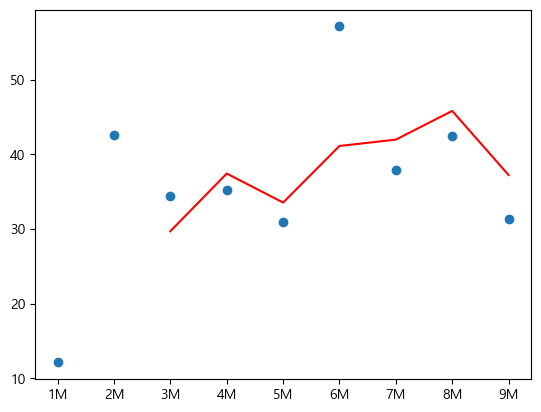

In [20]:
# 그래프 시각화
plt.scatter(x=ma_data.index, y='month_price', data=ma_data)
plt.plot(ma_data.index[2:], ma_data['ma_3'][2:], c='red');

#### (2) 1월 대비 9월의 은의 가격은 몇 % 올랐는가?(소수점 두 번째 자리에서 반올림)

In [32]:
round(ma_data['month_price'][-1] / ma_data['month_price'][0] *100, 1) # 9월 가격 / 1월 가격 * 100

258.5

### 3. 아래 그래프는 A, B, C 자치구별 H의원에 대한 찬성, 반대 투표 결과이다. 자치구별 지지율이 같은지에 대해서 검정하시오.
[가설]
- 귀무가설: 자치구와 지지율은 서로 독립이다.
- 대립가설: 자치구와 지지율은 서로 독립이 아니다.

In [47]:
data = pd.DataFrame({
    'A': [176, 124],
    'B': [193, 107],
    'C': [159, 141]
}, index=['찬성', '반대'])
data

,A,B,C
찬성,176,193,159
반대,124,107,141


In [48]:
# 독립성 검정
from scipy.stats import chi2_contingency
chi, p, df, expect = chi2_contingency(data)
print('Statistic:', chi)
print('p-value:', p)
print('df:', df)
print('expect:\n', expect)

Statistic: 7.945381231671554
p-value: 0.01882272023214683
df: 2
expect:
 [[176. 176. 176.]
 [124. 124. 124.]]


### 4. A학교 남녀 학생들의 평균 혈압 차이가 있는지 여부에 대한 검정하시오.(단, 남학생과 여학생의 혈압 데이터는 정규분포를 따르며 등분산임을 가정).

#### (1) 남녀 학생들의 평균 혈압 차이가 있는지에 대해 가설을 설정하시오.
[가설]
- 귀무가설: 성별에 따른 평균 혈압에 차이가 없다.
- 대립가설: 성별에 따른 평균 혈압에 차이가 있다.

#### (2) 검정통계량을 구하고 판단하시오.

In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem6.csv')
df.head()

,gender,pressure
0,male,106.8
1,male,100.8
2,male,84.5
3,male,104.2
4,male,107.0


In [11]:
import scipy.stats as stats
male = df.loc[df.gender=='male', 'pressure']
female = df.loc[df.gender=='female', 'pressure']

stats.ttest_ind(male, female, equal_var=True)

Ttest_indResult(statistic=1.3813481801194591, pvalue=0.18044550626193734)

[해석]
- p-value > 0.05 이므로 귀무가설을 기각하지 못하므로, 성별에 따른 평균 혈압에 차이가 없다고 할 수 있음.

#### (3) 평균 혈압차의 신뢰구간 구했을 때, 판단한 결과가 (2)의 결과를 지지하는지 설명하시오.

In [29]:
from numpy import array, mean
from scipy.stats import sem, t
import numpy as np

# 통합 표준편차(sp)를 구하는 공식이 복합하므로 함수를 만들어 사용
def sp(data1, data2) : 
    df = len(data) + len(data2) -2
    s1 = (len(data1)-1) * (data1.std()**2)
    s2 = (len(data2)-1) * (data2.std()**2)
    sp = np.sqrt((s1+s2)/ df)
    return sp 

In [30]:
alpha = 0.95 
dof = len(male) + len(female) -2
diff_mean = np.mean(male) - np.mean(female)
s =  sp(male,female) * (1/len(male) + 1/len(female))

CI = stats.t.interval(alpha, dof, loc = diff_mean, scale = s) 
CI

(0.7210256360769041, 9.872029919478662)

### 5. height(키), weight(몸무게), waist(허리둘레) 컬럼을 가진 problem7.csv파일을 가지고 다음을 분석하시오 A시의 20대 남성 411명을 임의로 추출하여 키, 몸무게, 허리둘레를 조사하여 기록한 데이터이다. 이 데이터를 이용하여 20대 남성의 키와 허리둘레가 체중에 영향을 미치는지 알아보시오.
#### (1) 아래 조건을 참고하여 회귀계수(반올림하여 소수점 두 자리)를 구하시오.

In [31]:
df = pd.read_csv('https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/26_problem7.csv')
df.head()

,height,weight,waistline
0,174.396,72.102,79.3787
1,179.656,81.255,80.6649
2,175.079,76.207,80.3166
3,180.804,81.354,80.8794
4,177.448,78.768,80.3499


In [32]:
from sklearn import linear_model
help(linear_model)

Help on package sklearn.linear_model in sklearn:

NAME
    sklearn.linear_model - The :mod:`sklearn.linear_model` module implements a variety of linear models.

PACKAGE CONTENTS
    _base
    _bayes
    _cd_fast
    _coordinate_descent
    _glm (package)
    _huber
    _least_angle
    _logistic
    _omp
    _passive_aggressive
    _perceptron
    _ransac
    _ridge
    _sag
    _sag_fast
    _sgd_fast
    _stochastic_gradient
    _theil_sen
    base
    bayes
    cd_fast
    coordinate_descent
    huber
    least_angle
    logistic
    omp
    passive_aggressive
    perceptron
    ransac
    ridge
    sag
    sag_fast
    setup
    sgd_fast
    stochastic_gradient
    tests (package)
    theil_sen
    ~ests (package)
    ~glm (package)

CLASSES
    sklearn.base.BaseEstimator(builtins.object)
        sklearn.linear_model._huber.HuberRegressor(sklearn.linear_model._base.LinearModel, sklearn.base.RegressorMixin, sklearn.base.BaseEstimator)
        sklearn.linear_model._logistic.LogisticR

In [33]:
from sklearn.linear_model._bayes import ARDRegression
help(ARDRegression)

Help on class ARDRegression in module sklearn.linear_model._bayes:

class ARDRegression(sklearn.base.RegressorMixin, sklearn.linear_model._base.LinearModel)
 |  ARDRegression(*, n_iter=300, tol=0.001, alpha_1=1e-06, alpha_2=1e-06, lambda_1=1e-06, lambda_2=1e-06, compute_score=False, threshold_lambda=10000.0, fit_intercept=True, normalize=False, copy_X=True, verbose=False)
 |  
 |  Bayesian ARD regression.
 |  
 |  Fit the weights of a regression model, using an ARD prior. The weights of
 |  the regression model are assumed to be in Gaussian distributions.
 |  Also estimate the parameters lambda (precisions of the distributions of the
 |  weights) and alpha (precision of the distribution of the noise).
 |  The estimation is done by an iterative procedures (Evidence Maximization)
 |  
 |  Read more in the :ref:`User Guide <bayesian_regression>`.
 |  
 |  Parameters
 |  ----------
 |  n_iter : int, default=300
 |      Maximum number of iterations.
 |  
 |  tol : float, default=1e-3
 |    

In [36]:
from sklearn.model_selection import train_test_split
X= df[['height', 'weight']]
y = df['waistline']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=7)

In [37]:
clf = ARDRegression(n_iter=1000, alpha_2=.005, lambda_1=.005, fit_intercept=False) # 부적절한 균일분포
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
clf.coef_

array([ 0.53879393, -0.19168936])

#### (2) 위에서 만든 모델을 바탕으로 키 180cm, 허리둘레 85cm인 남성의 몸무게를 추정하시오.

In [38]:
clf.predict([[180, 85]])

array([80.68931085])